In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import os

# Constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 100
LEARNING_RATE = 1e-4
DATASET_PATH = '/content/drive/MyDrive/dataset'
MODEL_SAVE_PATH = '/content/drive/MyDrive/vgg16_model.keras'  # Save in .h5 format

# Check if dataset path exists
if not os.path.exists(DATASET_PATH):
    raise FileNotFoundError(f"Dataset path {DATASET_PATH} does not exist.")

In [7]:
# Create image data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    DATASET_PATH, target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE, class_mode='categorical', subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    DATASET_PATH, target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE, class_mode='categorical', subset='validation'
)


Found 745 images belonging to 4 classes.
Found 183 images belonging to 4 classes.


In [8]:
# Define the model with Input layer
input_layer = tf.keras.layers.Input(shape=IMAGE_SIZE + (3,))
base_model = tf.keras.applications.VGG16(
    input_tensor=input_layer, include_top=False, weights='imagenet'
)

# Build the model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])


In [9]:


# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [10]:



# Callbacks for model training
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6),
    ModelCheckpoint(MODEL_SAVE_PATH, save_best_only=True, verbose=1)
]

# Train the model
model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.2491 - loss: 1.7278
Epoch 1: val_loss improved from inf to 1.38267, saving model to /content/drive/MyDrive/vgg16_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 343s 10s/step - accuracy: 0.2486 - loss: 1.7198 - val_accuracy: 0.2568 - val_loss: 1.3827 - learning_rate: 1.0000e-04
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 926ms/step - accuracy: 0.2726 - loss: 1.3784
Epoch 2: val_loss improved from 1.38267 to 1.37582, saving model to /content/drive/MyDrive/vgg16_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.2730 - loss: 1.3786 - val_accuracy: 0.2568 - val_loss: 1.3758 - learning_rate: 1.0000e-04
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2708 - loss: 1.3722
Epoch 3: val_loss improved from 1.37582 to 1.37544, saving model to /content/drive/MyDrive/vgg16_model.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.2705 - loss: 1.3724 - val_accuracy: 0.2514 - val_loss: 1.3754 - learning_rate: 1.0000e-04
Epo

In [11]:

# Save the model properly
model.save(MODEL_SAVE_PATH)
print(f"Model saved at: {MODEL_SAVE_PATH}")


Model saved at: /content/drive/MyDrive/vgg16_model.keras


In [12]:
model.save('/content/drive/MyDrive/vgg16_final_model.h5', save_format='h5')


In [14]:
# Export the model as a SavedModel directory
model.export('/content/drive/MyDrive/vgg16_saved_model')


Saved artifact at '/content/drive/MyDrive/vgg16_saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_38')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  138026377067536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138026377066480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138026359276992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138026359278224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138026359281216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138026359283856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138026359284208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138026359286496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138026359288080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138026359290368: TensorSpec(shape=(), dtype=tf.resource, 

In [15]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 916ms/step - accuracy: 0.9938 - loss: 0.0188
Epoch 1: val_loss did not improve from 0.05140
24/24 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.9939 - loss: 0.0185 - val_accuracy: 0.9781 - val_loss: 0.0833 - learning_rate: 1.2500e-05
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 917ms/step - accuracy: 1.0000 - loss: 0.0058
Epoch 2: val_loss did not improve from 0.05140
24/24 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 0.9781 - val_loss: 0.0855 - learning_rate: 1.2500e-05
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 890ms/step - accuracy: 0.9990 - loss: 0.0052
Epoch 3: val_loss did not improve from 0.05140
24/24 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9990 - loss: 0.0053 - val_accuracy: 0.9781 - val_loss: 0.0630 - learning_rate: 1.2500e-05
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 946ms/step - accuracy: 0.9973 - loss: 0.0059
Epoch 4: val_loss improved from 0.05140 to 0.05081, saving model to /content/drive

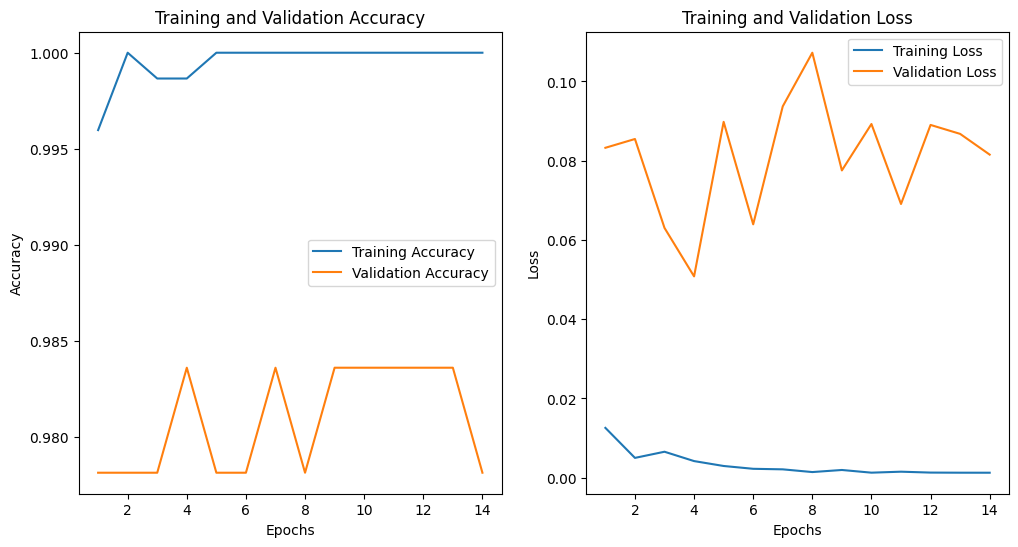

In [16]:
import matplotlib.pyplot as plt

# Extract data from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Display the plots
plt.show()


In [17]:

import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [18]:

# Evaluate the model on a test set (if available)
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Example prediction function
def predict_image(image_path):
    try:
        img = load_img(image_path, target_size=IMAGE_SIZE)
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        predictions = model.predict(img_array)
        return np.argmax(predictions, axis=1)
    except Exception as e:
        print(f"Prediction error: {e}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 923ms/step - accuracy: 0.9874 - loss: 0.0396
Test Loss: 0.05287284404039383, Test Accuracy: 0.9836065769195557


6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step
                                      precision    recall  f1-score   support

       Myocardial Infarction Patient       0.30      0.30      0.30        47
                              Normal       0.31      0.32      0.32        56
     Patient that have History of MI       0.21      0.21      0.21        34
Patient that have abnormal heartbeat       0.23      0.22      0.22        46

                            accuracy                           0.27       183
                           macro avg       0.26      0.26      0.26       183
                        weighted avg       0.27      0.27      0.27       183



<Figure size 800x800 with 0 Axes>

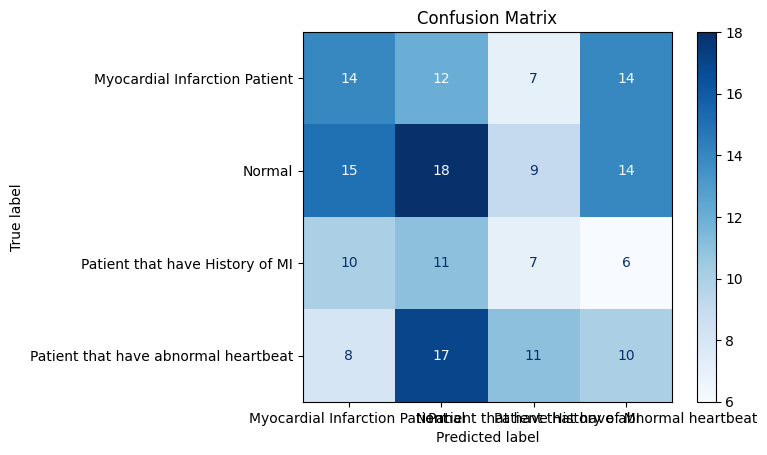

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Get true labels and predictions
y_true = validation_generator.classes  # True labels from validation set
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys()))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_generator.class_indices.keys())

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step


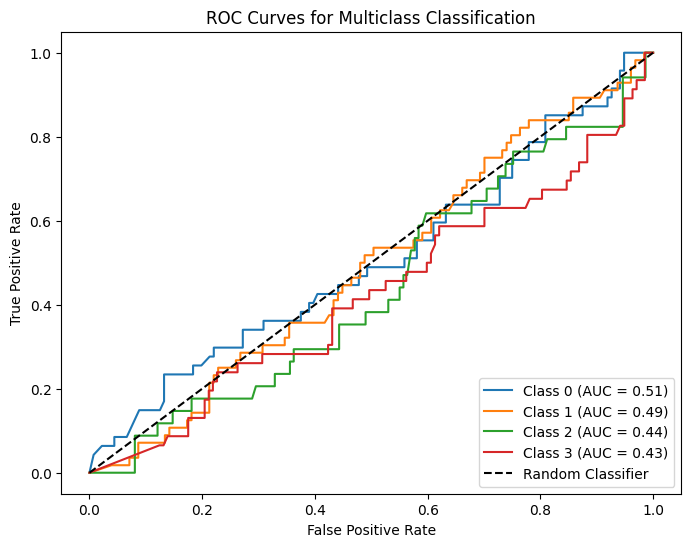

In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the true labels and predicted probabilities for all classes
y_pred_proba = model.predict(validation_generator)

# Plot ROC curve for each class
num_classes = y_pred_proba.shape[1]  # Number of classes
y_true = validation_generator.classes

plt.figure(figsize=(8, 6))

for i in range(num_classes):
    # Binarize the true labels for class 'i'
    y_true_binary = (y_true == i).astype(int)

    # Compute ROC curve and AUC for the current class
    fpr, tpr, _ = roc_curve(y_true_binary, y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot random classifier line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Add plot details
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()


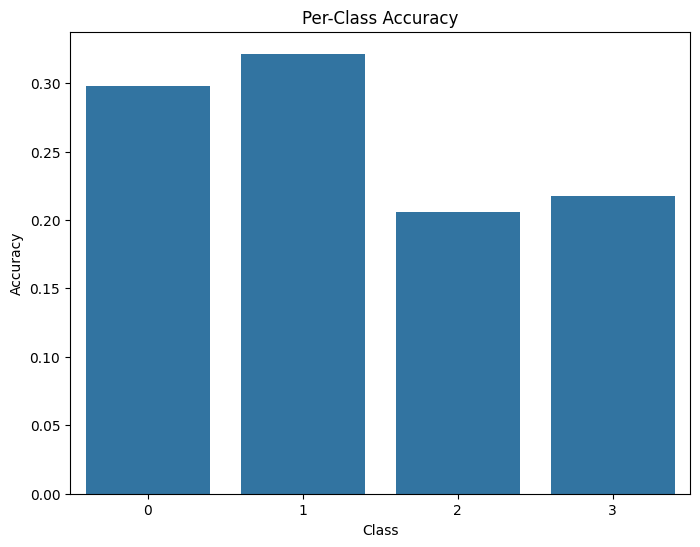

In [22]:
import seaborn as sns
import pandas as pd

# Calculate per-class accuracy
correct_predictions = (y_true == y_pred_classes)
class_accuracies = pd.Series(correct_predictions).groupby(y_true).mean()

# Plot per-class accuracy
plt.figure(figsize=(8, 6))
sns.barplot(x=class_accuracies.index, y=class_accuracies.values)
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.show()


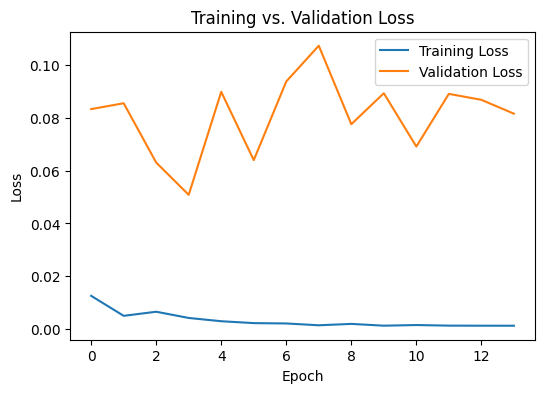

In [23]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(history.history['loss'], label='Training Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Training vs. Validation Loss')
ax.legend()
plt.show()
